# Testing Cascade Haar and CNN

In [3]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import shutil
import cv2
import os

Using TensorFlow backend.


In [6]:
def neural_network_2828(image):
    orig = image
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # load the trained convolutional neural network
    print("[INFO] loading network...")
    #
    # NOT_VERTEX
    # model = load_model('./models/neural_networks/not_vertex_sort.model')
    #
    # # classify the input image
    # (vertex, notVertex) = model.predict(image)[0]

    # # VERTEX
    model = load_model('./models/neural_networks/vertex_sort.model')

    # classify the input image
    (notVertex, vertex) = model.predict(image)[0]

    # build the label
    label = "Vertex" if vertex > notVertex else "Not Vertex"
    proba = vertex if vertex > notVertex else notVertex
    labelprob = "{}: {:.2f}%".format(label, proba * 100)

    # draw the label on the image
    # output = imutils.resize(orig, width=400)
    # cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    return (label, labelprob, str(float("{0:.2f}".format(proba * 100))))

In [7]:
def haartest(image):
    # This is the cascade we just made. Call what you want
    cascade30 = cv2.CascadeClassifier('./models/haar/haar_2020_2/cascade.xml')

    img = cv2.imread(image)
    if img is None:
        print('Error!!!!')
    img_c = img.copy()

    # filters
    gray = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY)
    # gaus = cv2.GaussianBlur(gray, (5, 5), 2)

    vertex30 = cascade30.detectMultiScale(gray)

    it = 0
    # get rectangle
    for (x, y, w, h) in vertex30:
        crop_img = img[y:y + h, x:x + w]
        label = neural_network_2828(crop_img)

        # put text
        if (label[0] == "Vertex"):
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img, 'V'+label[2], (x - 2, y - 2), font, 0.5, (255, 0, 255), 1, cv2.LINE_AA)
        else:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img, 'NV'+label[2], (x - 2, y - 2), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

        it += 1


    # save image
    x = image.split("/")
    print(x[-1])
    path = './results/result_Haar_NN_test/'
    # os.mkdir(path)

    # cv2.imshow('img',img)
    cv2.imwrite(path + x[-1], img)
    # exit(0)
    # cv2.waitKey()

In [8]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)

        shutil.rmtree(directory, ignore_errors=True)
        os.makedirs(directory)
    except OSError:
        print('Error: Creating directory. ' + directory)

# Simple CNN testing

In [9]:
def neural_network(image, dirtocnn):
    orig = image
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    print("[INFO] loading network...")
    
    # VERTEX
    model = load_model('./../models/neural_networks/' + dirtocnn)
    vertex = 0
    notVertex = 0
    print(dirtocnn.split('_')[0])
    
    if dirtocnn.split('_')[0] == 'not':
        # classify the input image
        (vertex, notVertex) = model.predict(image)[0]
    else:
        # classify the input image
        (notVertex, vertex) = model.predict(image)[0]

    # build the label
    label = "Vertex" if vertex > notVertex else "Not Vertex"
    proba = vertex if vertex > notVertex else notVertex
    labelprob = "{}: {:.2f}%".format(label, proba * 100)

    # draw the label on the image
    # output = imutils.resize(orig, width=400)
    # cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    return (label, labelprob, str(float("{0:.2f}".format(proba * 100))))

In [10]:
# create dir
path = './results/resulTesting_Haar_CNN/'
# os.mkdir(path)
createFolder(path)

wastefiles = ['.DS_Store', '.ipynb_checkpoints']

modelDir = './../models/neural_networks/'
listOfModelsFiles = os.listdir(modelDir)

listOfModelsFiles.sort()

# errors and debug logs
# sys.stdout = open('./result/' + 'output.log', 'w')

Dir = './../data/'
listOfFiles = os.listdir(Dir)  
listOfFiles.sort()    
print(listOfFiles)

image = listOfFiles
image.remove('.DS_Store')
forFileDic = {'image': image}

for i in listOfModelsFiles:
    if i not in wastefiles:
        # create folder
        path = './../' + str(i).split('.')[0] + '/'
        createFolder(path)

        cascade30 = cv2.CascadeClassifier('./../models/haar/haar_2020_2/cascade.xml')
        
        Dir = './../data/'
        listOfFiles = os.listdir(Dir)
        
        listOfFiles.sort()
        
        # print(listOfFiles)
        
        haarRecognitionV = []
        haarRecognitionNV = []

        for j in listOfFiles:
            if j not in wastefiles:
                image = str(j)

                img = cv2.imread(Dir + image)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                gaus = cv2.GaussianBlur(gray, (5, 5), 2)

                vertex30 = cascade30.detectMultiScale(img)
                
                sumofV = 0
                sumofNV = 0
                # get rectangle
                for (x, y, w, h) in vertex30:
                    crop_img = img[y:y + h, x:x + w]
                    print(i)
                    label = neural_network(crop_img, i)

                    # put text
                    if (label[0] == "Vertex"):
                        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
                        font = cv2.FONT_HERSHEY_SIMPLEX
                        cv2.putText(img, 'V'+label[2], (x - 2, y - 2), font, 0.5, (255, 0, 255), 1, cv2.LINE_AA)
                        sumofV += 1
                    else:
                        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                        font = cv2.FONT_HERSHEY_SIMPLEX
                        cv2.putText(img, 'NV'+label[2], (x - 2, y - 2), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                        sumofNV += 1

                if image.split('_')[0] == sumofV:
                    haarRecognitionV.append(str(True))
                else:
                    haarRecognitionV.append(str(False))
                haarRecognitionNV.append(str(sumofNV))
                
                cv2.imwrite(path + image, img)
        # dat.close()
        
        forFileDic[str(i)] = haarRecognitionV
        forFileDic[str(i) + "_NV"] = haarRecognitionNV

print('Done!')

['.DS_Store', '10_1.JPG', '2_1.JPG', '2_2.JPG', '3_1.JPG', '4_1.JPG', '4_2.JPG', '5_1.JPG', '5_2.JPG', '6_1.JPG', '6_2.JPG', '6_3.JPG', '6_4.JPG', '6_5.JPG', '8_1.JPG', '9_1.jpg']
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...
not
not_vertex2828_big.model
[INFO] loading network...

not
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828_big.model
[INFO] loading network...
vertex2828
vertex2828

vertex2828_small.model
[INFO] loading network...
vertex2828
vertex2828_small.model
[INFO] loading network...
vertex2828
vertex2828_small.model
[INFO] loading network...
vertex2828
vertex2828_small.model
[INFO] loading network...
vertex2828
vertex2828_small.model
[INFO] loading network...
vertex2828
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading network...
vertex
vertex_sort.model
[INFO] loading netw

## Create cvs file

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import os
%matplotlib inline

In [25]:
# forFileDic

with open('./../result_testing.csv', mode='w') as csv_file:
    fieldnames = forFileDic.keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for i in range(0, len(forFileDic.get('image'))):
        row = {}
        for header in fieldnames:
            el = forFileDic.get(header)   # get list
            row[header] = el[i]
        
        print('Row: ', row)
        writer.writerow(row)

Row:  {'image': '10_1.JPG', 'not_vertex2828_big.model': 'False', 'not_vertex2828_big.model_NV': '0', 'not_vertex2828_small.model': 'False', 'not_vertex2828_small.model_NV': '0', 'vertex2828_big.model': 'False', 'vertex2828_big.model_NV': '0', 'vertex2828_small.model': 'False', 'vertex2828_small.model_NV': '0', 'vertex_sort.model': 'False', 'vertex_sort.model_NV': '0'}
Row:  {'image': '2_1.JPG', 'not_vertex2828_big.model': 'False', 'not_vertex2828_big.model_NV': '0', 'not_vertex2828_small.model': 'False', 'not_vertex2828_small.model_NV': '0', 'vertex2828_big.model': 'False', 'vertex2828_big.model_NV': '0', 'vertex2828_small.model': 'False', 'vertex2828_small.model_NV': '0', 'vertex_sort.model': 'False', 'vertex_sort.model_NV': '0'}
Row:  {'image': '2_2.JPG', 'not_vertex2828_big.model': 'False', 'not_vertex2828_big.model_NV': '0', 'not_vertex2828_small.model': 'False', 'not_vertex2828_small.model_NV': '0', 'vertex2828_big.model': 'False', 'vertex2828_big.model_NV': '0', 'vertex2828_small

#### Analysis csv file

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [32]:
data = pd.read_csv('./../result_testing.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [33]:
data

,image,not_vertex2828_big.model,not_vertex2828_big.model_NV,not_vertex2828_small.model,not_vertex2828_small.model_NV,vertex2828_big.model,vertex2828_big.model_NV,vertex2828_small.model,vertex2828_small.model_NV,vertex_sort.model,vertex_sort.model_NV
0,10_1.JPG,False,0,False,0,False,0,False,0,False,0
1,2_1.JPG,True,0,True,0,True,0,True,0,True,0
2,2_2.JPG,True,0,True,0,True,0,True,0,True,0
3,3_1.JPG,True,0,True,0,True,0,True,0,True,0
4,4_1.JPG,True,0,True,0,True,0,True,0,True,0
5,4_2.JPG,False,0,False,0,False,0,False,0,False,0
6,5_1.JPG,True,0,True,0,True,0,True,0,True,0
7,5_2.JPG,False,0,False,0,False,0,False,0,False,0
8,6_1.JPG,True,1,False,0,True,1,False,0,True,1
9,6_2.JPG,False,2,False,2,False,1,False,0,False,0


**Опишем данные**

In [35]:
data.describe()

,not_vertex2828_big.model_NV,not_vertex2828_small.model_NV,vertex2828_big.model_NV,vertex2828_small.model_NV,vertex_sort.model_NV
count,15.000000,15.000000,15.000000,15.0,15.000000
mean,0.200000,0.200000,0.133333,0.0,0.066667
std,0.560612,0.560612,0.351866,0.0,0.258199
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000
max,2.000000,2.000000,1.000000,0.0,1.000000


**Сравним not_vertex2828_big.model, not_vertex2828_small.model, vertex2828_big.model**

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


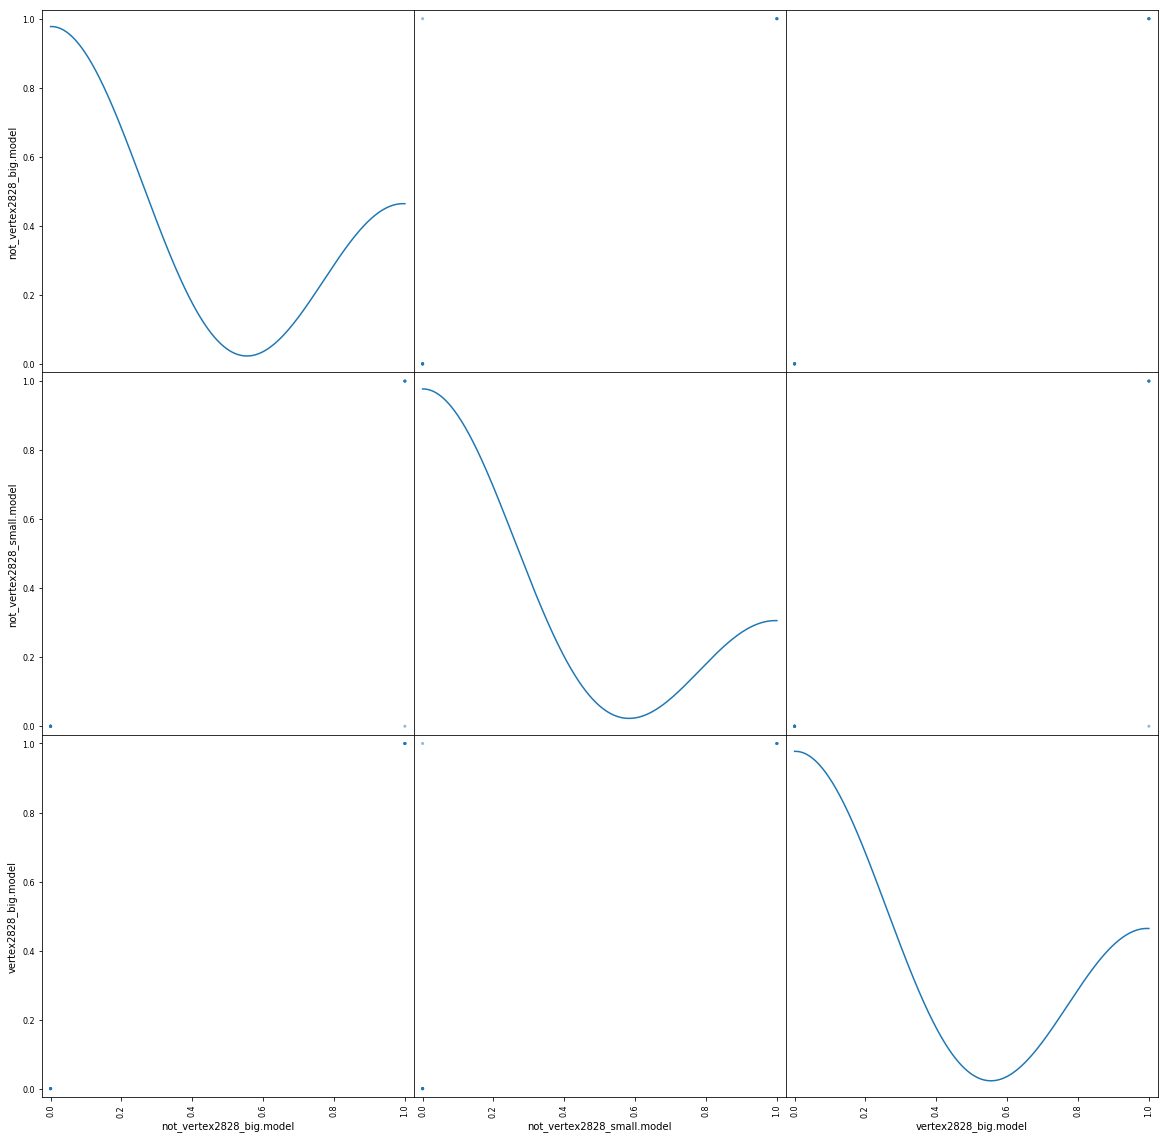

<Figure size 5400x3600 with 0 Axes>

In [36]:
pd.scatter_matrix(data[['not_vertex2828_big.model', 'not_vertex2828_small.model', 'vertex2828_big.model']], figsize=(20, 20), diagonal='kde')
plt.figure(dpi=900)
plt.show()

**Сравним vertex2828_big.model, vertex2828_small.model, vertex_sort.model**

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


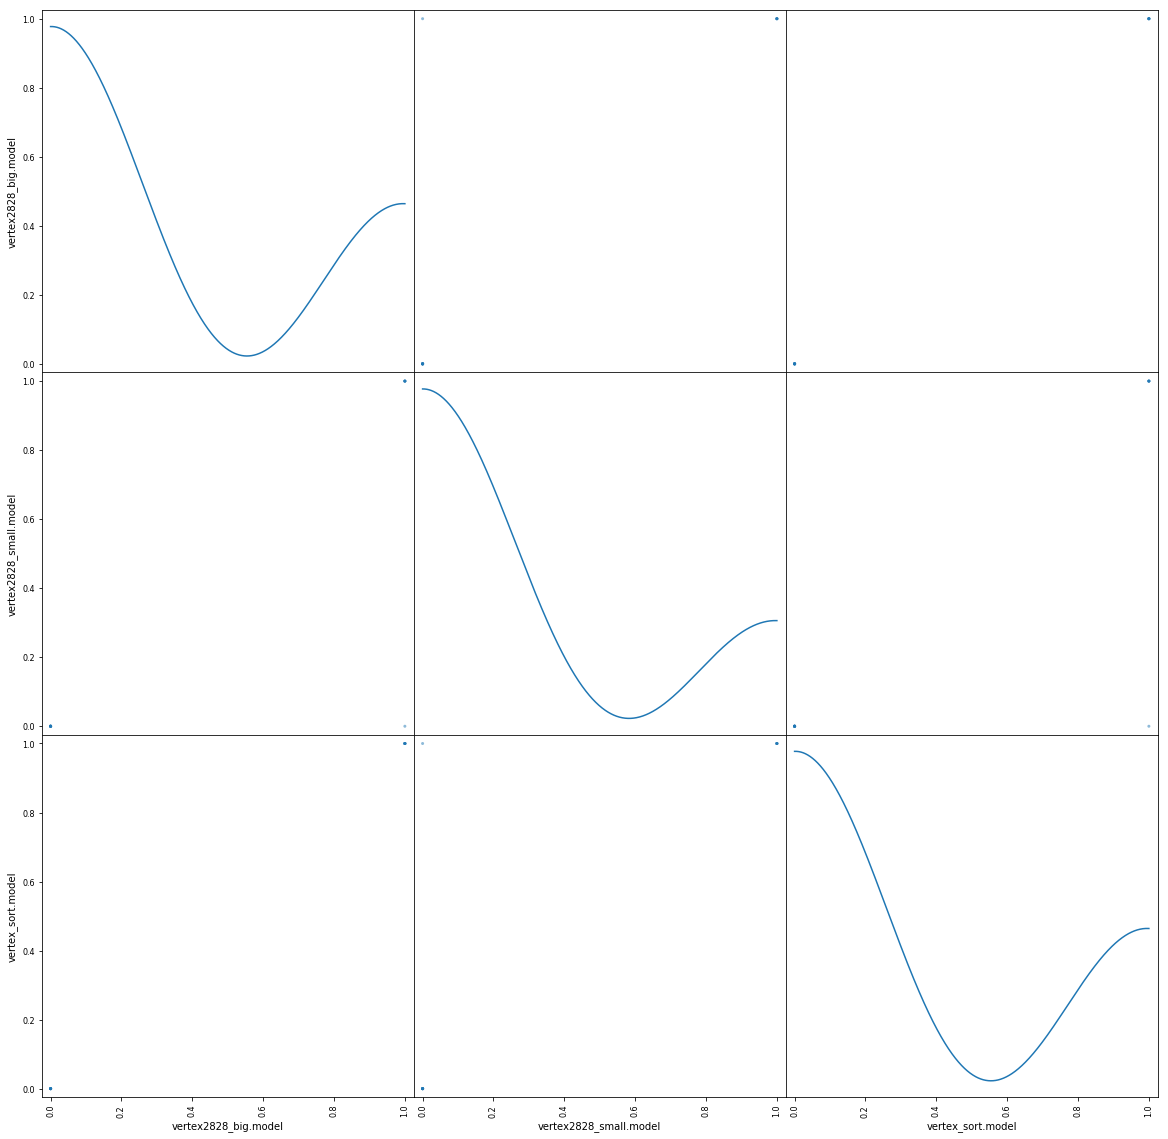

<Figure size 5400x3600 with 0 Axes>

In [37]:
pd.scatter_matrix(data[['vertex2828_big.model', 'vertex2828_small.model', 'vertex_sort.model']], figsize=(20, 20), diagonal='kde')
plt.figure(dpi=900)
plt.show()

**Сравним not_vertex2828_big.model, not_vertex2828_small.model, vertex2828_big.model vertex2828_big.model, vertex2828_small.model, vertex_sort.model**

<Figure size 5400x3600 with 0 Axes>

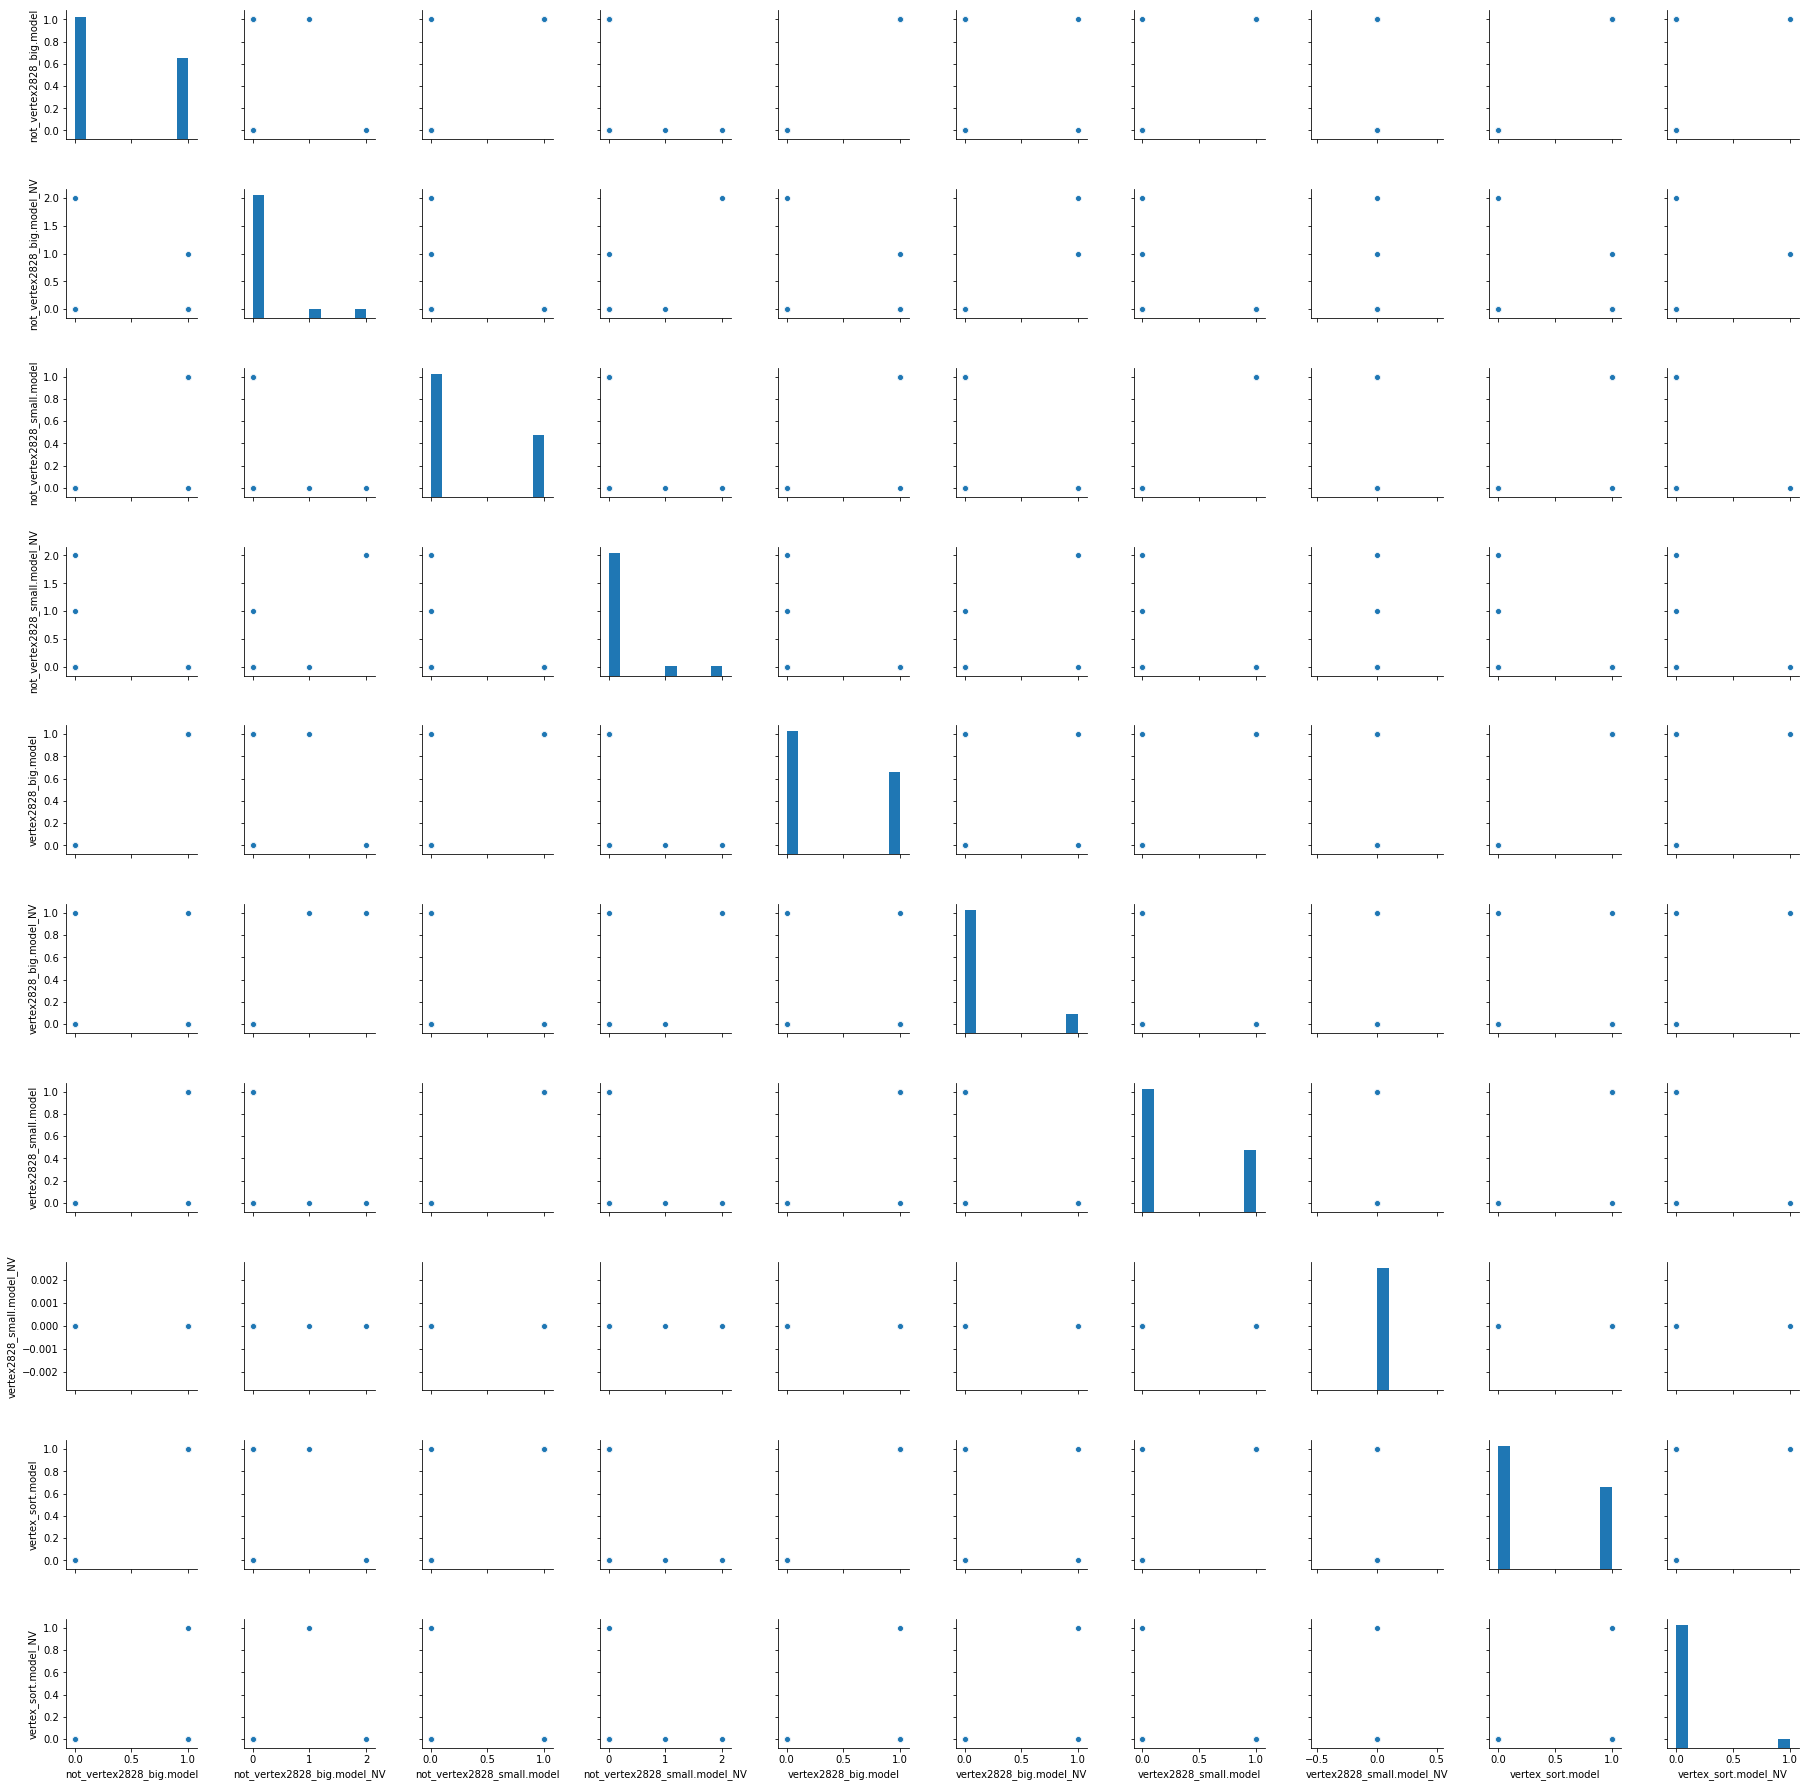

In [38]:
plt.figure(dpi=900)
sns.pairplot(data)
plt.savefig("./../pairplot(data).jpg")

**Проанализируем каждый стоолбец отдельно**

<Figure size 5400x3600 with 0 Axes>

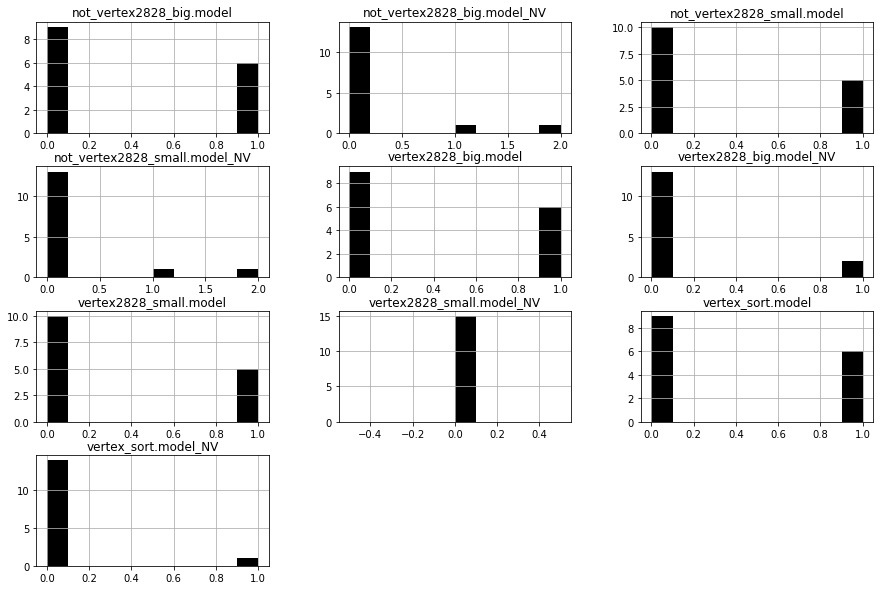

In [42]:
dt = data
plt.figure(dpi=900)
dt.hist(color = 'k', figsize=(15,10))
plt.show()

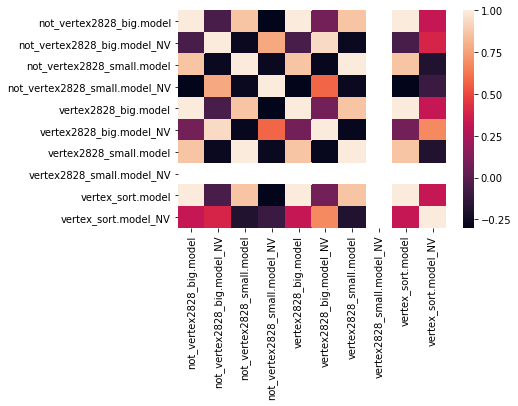

In [43]:
sns.heatmap(dt.corr());

# The best CNN

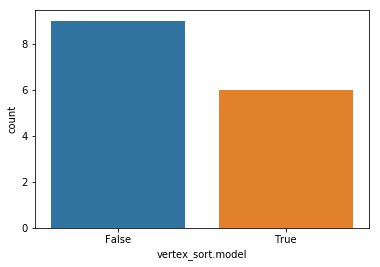

In [49]:
sns.countplot(data['vertex_sort.model'])

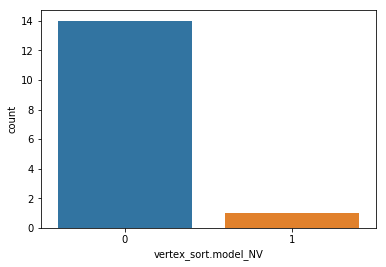

In [53]:
sns.countplot(data['vertex_sort.model_NV'])

In [50]:
head = ['vertex_sort.model']

zero = []

for j in range(0, len(head)):
    sumZero = 0
    for i in data[head[j]]:
        if i == 0:
            sumZero += 1
    
    zero.append(sumZero)

print(zero)

[9]
